The plot that relates the temperture vs the latitude is the one that shows a really high correlation between the proximity with the Ecuador and the high temperature. But it shows a logarithmic behaviour, which I consider is influenced by the not totally horizontal position of the earth in realtion with an imaginary X axis.

In relation with the humidity, we can see there is not a regular or equitative spatial distribution between the negative and positive latituds. We can see a major percentage of humidity in the positive sectoof the earth, having some max points between the lattude 40 and 60.

Finaly, we can see a relation between the humidity, cloudiness and wind speed. There are a variety of measures, but the max latitud of the south is between 40 and 60 but in the north we have the max value in the latitud 80. As we mentioned. It can be affected by the horizontal inclination of the earth


In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from config import api_key
from citipy import citipy

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [2]:
output_data_file = "cities.csv"

In [3]:
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [5]:
print(cities)


['busselton', 'komsomolskiy', 'albany', 'yerbogachen', 'wajima', 'bredasdorp', 'hobart', 'new norfolk', 'ushuaia', 'atuona', 'barrow', 'tuktoyaktuk', 'bethel', 'thinadhoo', 'umm lajj', 'timmins', 'lebu', 'kiruna', 'leme', 'saint-philippe', 'laguna', 'vila velha', 'seminole', 'ribeira grande', 'port blair', 'barsovo', 'airai', 'jamestown', 'helong', 'santona', 'necochea', 'kapaa', 'beringovskiy', 'susuman', 'ust-kamchatsk', 'mataura', 'kahului', 'mahebourg', 'mys shmidta', 'vaitape', 'paamiut', 'isangel', 'bluff', 'rikitea', 'port alfred', 'tarui', 'yellowknife', 'srednekolymsk', 'constitucion', 'bonthe', 'qaanaaq', 'vesoul', 'road town', 'omboue', 'kedougou', 'ust-kuyga', 'lolua', 'nikolskoye', 'urumqi', 'wageningen', 'longyearbyen', 'hermanus', 'saskylakh', 'kodiak', 'vaini', 'cape town', 'punta arenas', 'avarua', 'port hardy', 'klaksvik', 'longhua', 'san patricio', 'kirksville', 'nome', 'sawakin', 'sentyabrskiy', 'port-gentil', 'arraial do cabo', 'hithadhoo', 'taburao', 'along', 'bah

In [6]:
query_url = f"{url}appid=1029289456151159afb6fcb81a2191dd&q={city}&units={units}"
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=1029289456151159afb6fcb81a2191dd&q=samarai&units=metric'

In [8]:
array_temperature = []
array_humidity = []
array_cloudiness = []
array_temp_max = []
array_wind_speed = []
array_pressure = []
array_date = []
array_country = []
array_lat = []
array_long = []
array_city = []


current_temperature = 0
current_humidity = 0
current_cloudiness = 0
current_temp_max = 0
current_wind_speed = 0
current_pressure = 0

for city in cities:
    query_url = f"{url}appid=1029289456151159afb6fcb81a2191dd&q={city}&units={units}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    if weather_json["cod"] != '404':
    # store the value of "main" 
    # key in variable y 
        array_city.append(city)
        current_temperature = weather_json["main"]["temp"] 
        array_temperature.append(current_temperature)
        current_pressure = weather_json["main"]["pressure"]   
        array_pressure.append(current_pressure)
        current_humidity = weather_json["main"]["humidity"] 
        array_humidity.append(current_humidity)
        current_temp_max = weather_json["main"]["temp_max"]
        array_temp_max.append(current_temp_max)
        current_cloudiness = weather_json["clouds"]["all"]
        array_cloudiness.append(current_cloudiness)
        current_wind_speed = weather_json["wind"]["speed"]
        array_wind_speed.append(current_wind_speed)    

        array_date.append(weather_json["dt"])
        array_country.append(weather_json["sys"]["country"])
        array_lat.append(weather_json["coord"]["lat"])
        array_long.append(weather_json["coord"]["lon"])

In [9]:
data = {'City': array_city,'Cloudiness':array_cloudiness,'Country':array_country,'Date':array_date, 'Humidity':array_humidity,'Lat':array_lat,'Lng':array_long,'Max Temp': array_temp_max,'Wind Speed': array_wind_speed}

In [11]:
weather_df = pd.DataFrame(data)
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,busselton,0,AU,1547163295,100,-33.64,115.35,17.89,2.61
1,komsomolskiy,68,RU,1547163364,66,67.55,63.78,-22.84,5.76
2,albany,75,US,1547162220,54,42.65,-73.75,-3.90,9.30
3,yerbogachen,0,RU,1547163365,74,61.28,108.01,-16.44,3.11
4,wajima,64,JP,1547163365,98,37.40,136.90,6.11,3.61
5,bredasdorp,0,ZA,1547161200,77,-34.53,20.04,16.00,1.50
6,hobart,75,AU,1547161200,56,-42.88,147.33,20.00,3.10
7,new norfolk,75,AU,1547161200,56,-42.78,147.06,20.00,3.10
8,ushuaia,40,AR,1547161200,44,-54.81,-68.31,16.00,9.30
9,atuona,24,PF,1547163366,100,-9.80,-139.03,27.51,7.36


In [12]:
weather_df.to_csv(output_data_file, sep='\t', encoding='utf-8')

<IPython.core.display.Javascript object>


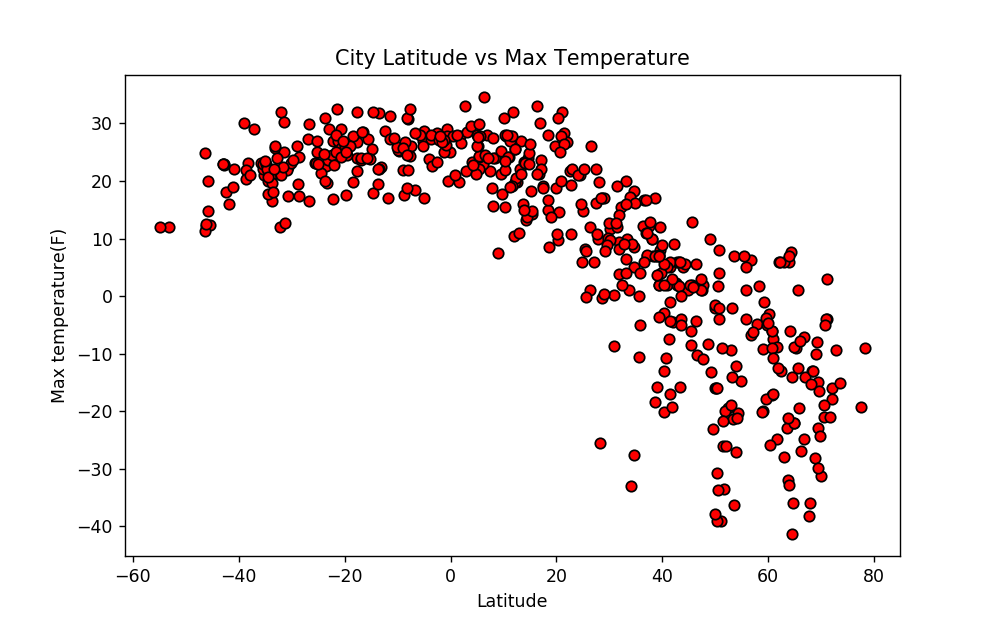

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(array_lat, array_temp_max, marker="o", facecolors="red", edgecolors="black")
# Set the upper and lower limits of our y axis
#plt.ylim(180,620)
# Set the upper and lower limits of our x axis
#plt.xlim(11,26)
# Create a title, x label, and y label for our chart
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max temperature(F)")
plt.show()
plt.savefig("Latitude_vs_Max_temp.png")

<IPython.core.display.Javascript object>


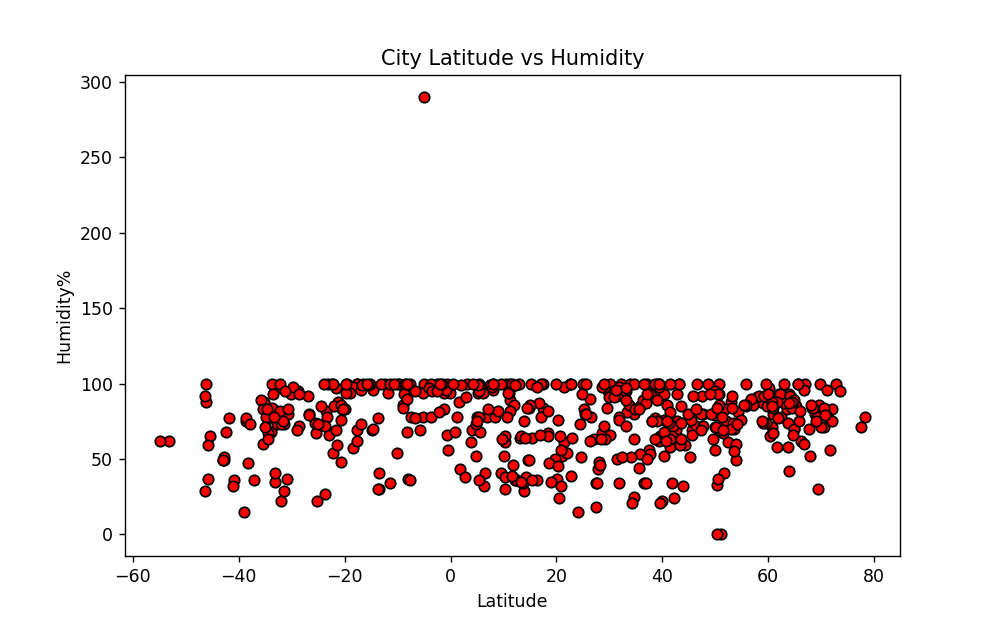

In [12]:
plt.figure(figsize=(8,5))
plt.scatter(array_lat, array_humidity, marker="o", facecolors="red", edgecolors="black")
# Set the upper and lower limits of our y axis
#plt.ylim(180,620)
# Set the upper and lower limits of our x axis
#plt.xlim(11,26)
# Create a title, x label, and y label for our chart
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity%")
plt.show()
plt.savefig("Latitude_vs_Himidity.png")

<IPython.core.display.Javascript object>


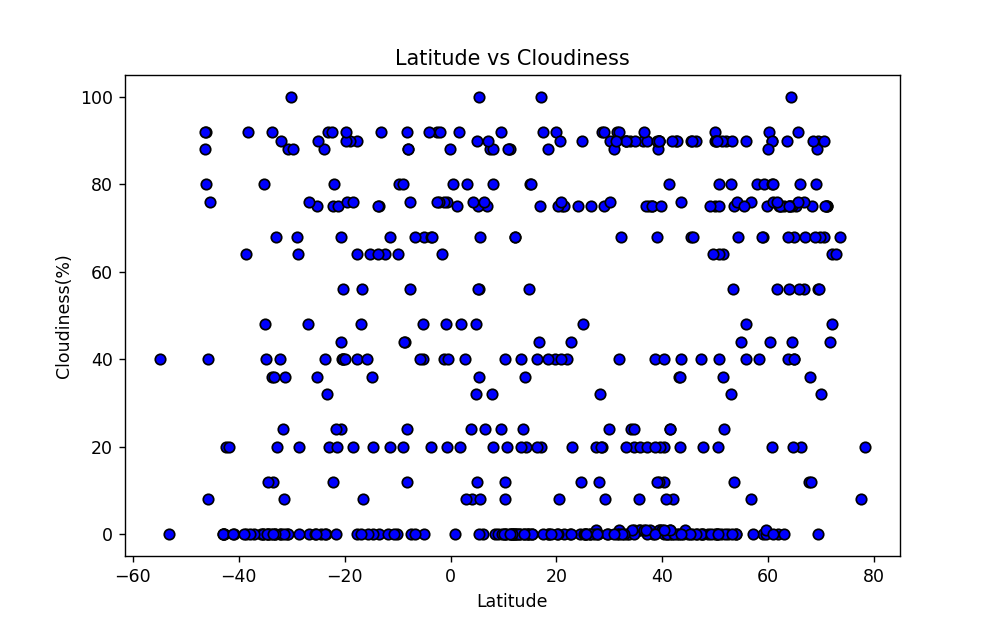

In [13]:
plt.figure(figsize=(8,5))
plt.scatter(array_lat, array_cloudiness, marker="o", facecolors="blue", edgecolors="black")
# Set the upper and lower limits of our y axis
#plt.ylim(180,620)
# Set the upper and lower limits of our x axis
#plt.xlim(11,26)
# Create a title, x label, and y label for our chart
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.show()
plt.savefig("Latitude_vs_Cloudiness.png")

<IPython.core.display.Javascript object>


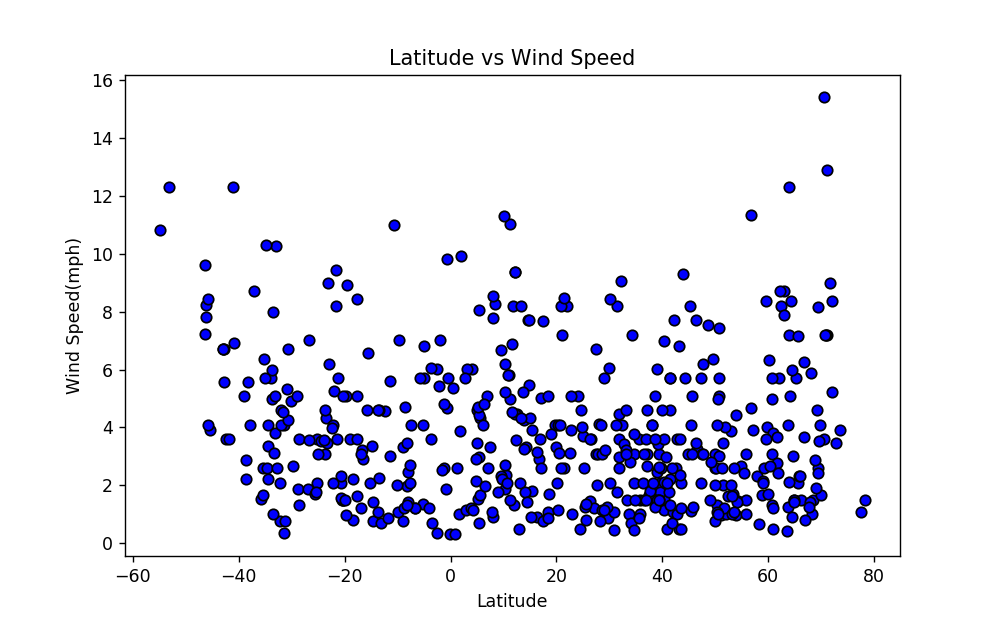

In [14]:
plt.figure(figsize=(8,5))
plt.scatter(array_lat, array_wind_speed, marker="o", facecolors="blue", edgecolors="black")
# Set the upper and lower limits of our y axis
#plt.ylim(180,620)
# Set the upper and lower limits of our x axis
#plt.xlim(11,26)
# Create a title, x label, and y label for our chart
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.show()
plt.savefig("Latitude_vs_Wind_Speed.png")